Start by loading and cleaning the data. 
(warning: this takes about 4 minutes to run)

In [ ]:
%%bash
pip install seaborn

In [7]:
import seaborn as sns

In [2]:
%run arlington_parking_meters_clean.ipynb

/var/folders/tn/1tqsy6b16xl_cxd8g27h18y00000gp/T/ipykernel_51502/3694701589.py:1: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  park = pd.read_csv(


Dropped 121308 rows due to invalid dates.


In [29]:
park = all_clean
park

,id,amt,tender,source,month,day,year
0,152,100,Coins,IPS,12,31,2015
1,172,100,Credit Card,IPS,12,31,2016
2,176,105,Coins,IPS,12,31,2016
3,207,40,Coins,IPS,12,31,2016
4,241,300,Coins,IPS,12,31,2016
...,...,...,...,...,...,...,...
3363294,26593642,1100,VISA,ParkMobile,9,20,2021
3363295,26593652,350,VISA,ParkMobile,9,20,2021
3363296,26593813,1100,MASTERCARD,ParkMobile,9,20,2021
3363297,26593823,350,VISA,ParkMobile,9,20,2021


<Axes: xlabel='amt', ylabel='Count'>

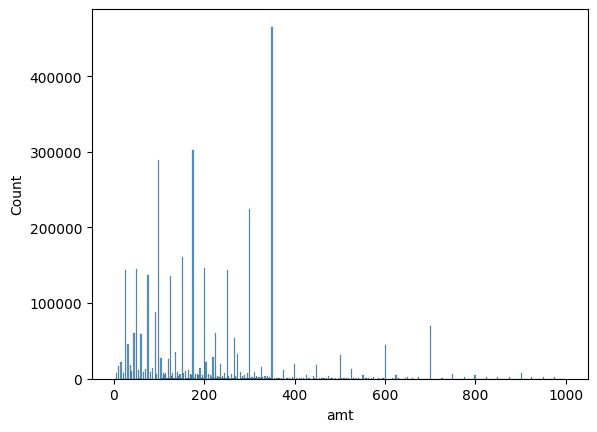

In [12]:

sns.histplot(data=park[park["amt"] < 1000], x="amt")


that's kind of hard to read, maybe a CDF chart will look nicer

<Axes: xlabel='amt', ylabel='Proportion'>

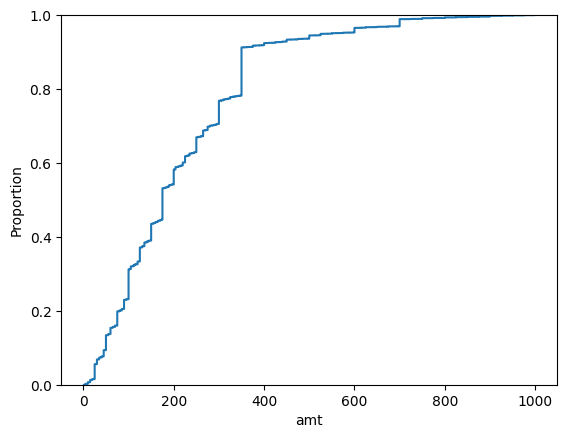

In [15]:
sns.ecdfplot(data=park[park["amt"] < 1000],x="amt")

<Axes: xlabel='count', ylabel='tender'>

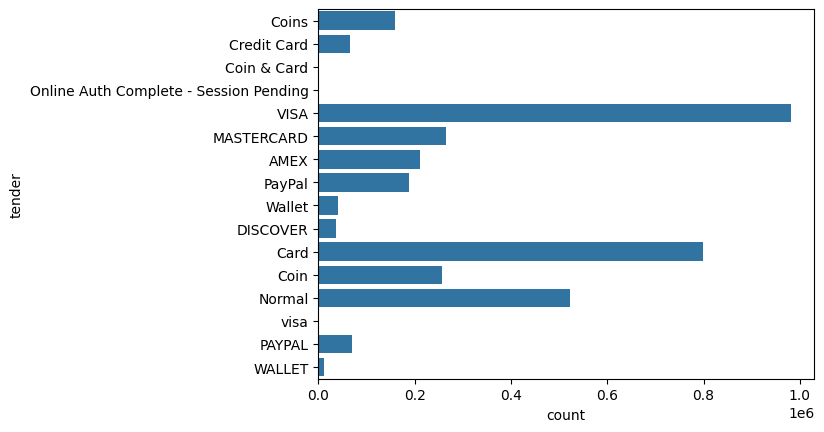

In [23]:
sns.countplot(data=park,y="tender",orient="v")

<Axes: xlabel='month', ylabel='amt'>

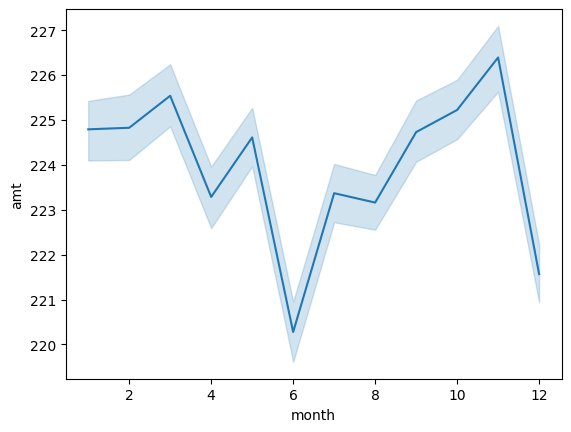

In [24]:
#huh, this is different from what I was trying to do, 
# but keeping it because it's interesting
# this is average transaction size
sns.lineplot(data=park,x="month",y="amt")

<Axes: xlabel='month', ylabel='amt'>

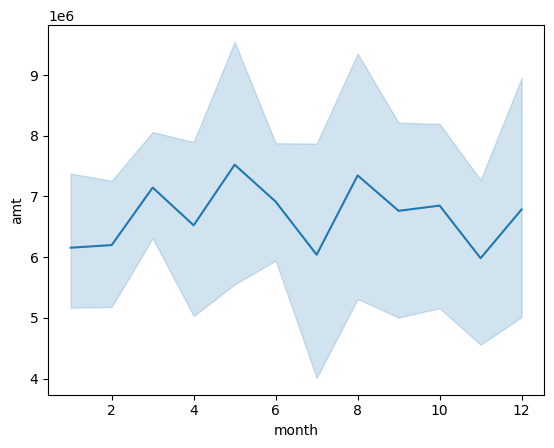

In [28]:
total_per_month = park.groupby(['month','year'])[["amt"]].sum()
sns.lineplot(data=total_per_month,x="month",y="amt")